In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacepy

import spectra_running_tools as SRT

In [2]:
spacecraft_coords_DF = pd.read_csv("IRENE8_450_circ_orbit_coords.txt",skiprows=73,header=None,skipfooter=1)
spacecraft_coords_DF.columns = ['ModifiedJulianDay',
'Altitude_km',
'Latitude_deg',
'Longitude_deg',
'LocalTime_hrs',
'PitchAngle_deg']
spacecraft_coords_DF

/tmp/ipykernel_7897/1845830959.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  spacecraft_coords_DF = pd.read_csv("IRENE8_450_circ_orbit_coords.txt",skiprows=73,header=None,skipfooter=1)


,ModifiedJulianDay,Altitude_km,Latitude_deg,Longitude_deg,LocalTime_hrs,PitchAngle_deg
0,18628.000000,1192.835,0.000000,354.938757,23.662584,90.0
1,18628.000694,1192.891,3.313331,354.688073,23.662538,90.0
2,18628.001389,1193.060,6.626412,354.437390,23.662493,90.0
3,18628.002083,1193.338,9.939000,354.186707,23.662447,90.0
4,18628.002778,1193.722,13.250860,353.936025,23.662402,90.0
...,...,...,...,...,...,...
1088,18628.755556,1193.970,-13.371240,82.192904,23.612860,90.0
1089,18628.756250,1193.583,-10.059640,81.942378,23.612825,90.0
1090,18628.756944,1193.301,-6.747288,81.691850,23.612790,90.0
1091,18628.757639,1193.129,-3.434439,81.441319,23.612755,90.0


In [3]:
IRENE8_450_electrons = pd.read_csv("IRENE8_450_circ_orbit_electrons.txt",skiprows=76,header=None,skipfooter=1)
IRENE8_450_electrons.columns = [
    "B Gauss",
    "L !8R!3!dE!n",
    0.04,
    0.1,
    0.2,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    1,
    1.25,
    1.5,
    1.75,
    2,
    2.25,
    2.5,
    2.75,
    3,
    3.25,
    3.5,
    3.75,
    4,
    4.25,
    4.5,
    4.75,
    5,
    5.5,
    6,
    6.5,
    7
]
IRENE8_450_electrons["B Gauss"] = spacecraft_coords_DF["Latitude_deg"]
IRENE8_450_electrons.rename(columns={"B Gauss":"Latitude_deg"},inplace=True)

IRENE8_450_electrons["L !8R!3!dE!n"] = spacecraft_coords_DF["Longitude_deg"]
IRENE8_450_electrons.rename(columns={"L !8R!3!dE!n":"Longitude_deg"},inplace=True)

IRENE8_450_electrons

/tmp/ipykernel_7897/3684036918.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  IRENE8_450_electrons = pd.read_csv("IRENE8_450_circ_orbit_electrons.txt",skiprows=76,header=None,skipfooter=1)


,Latitude_deg,Longitude_deg,0.04,0.1,0.2,0.3,0.4,0.5,0.6,0.7,...,3.75,4,4.25,4.5,4.75,5,5.5,6,6.5,7
0,0.000000,354.938757,1537300.0,1209300.0,750380.0,339930.0,112420.0,37182.0,19539.0,10268.0,...,1.6375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.313331,354.688073,729880.0,574970.0,363090.0,168080.0,57040.0,19357.0,10406.0,5594.3,...,1.5384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.626412,354.437390,387980.0,307940.0,198260.0,94564.0,33416.0,11808.0,6514.8,3594.5,...,1.9403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.939000,354.186707,287760.0,228280.0,146830.0,69917.0,24649.0,8689.6,4788.0,2638.2,...,1.4023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.250860,353.936025,201860.0,159250.0,98662.0,45200.0,15312.0,5187.2,2785.8,1496.1,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,-13.371240,82.192904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1089,-10.059640,81.942378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1090,-6.747288,81.691850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1091,-3.434439,81.441319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
np.any((IRENE8_450_electrons.iloc[:,3:].values - IRENE8_450_electrons.iloc[:,2:-1].values) > 0)

False

In [5]:
IRENE8_450_protons = pd.read_csv("IRENE8_450_circ_orbit_protons.txt",skiprows=74,header=None,skipfooter=1)
IRENE8_450_protons.columns = [
    "B Gauss",
    "L !8R!3!dE!n",
    0.1, 
    0.15, 
    0.2, 
    0.3, 
    0.4, 
    0.5, 
    0.6, 
    0.7, 
    1, 
    1.5, 
    2, 
    3, 
    4, 
    5, 
    6, 
    7, 
    10, 
    15, 
    20, 
    30, 
    40, 
    50, 
    60, 
    70, 
    100, 
    150, 
    200, 
    300, 
    400
]
IRENE8_450_protons["B Gauss"] = spacecraft_coords_DF["Latitude_deg"]
IRENE8_450_protons.rename(columns={"B Gauss":"Latitude_deg"},inplace=True)

IRENE8_450_protons["L !8R!3!dE!n"] = spacecraft_coords_DF["Longitude_deg"]
IRENE8_450_protons.rename(columns={"L !8R!3!dE!n":"Longitude_deg"},inplace=True)

IRENE8_450_protons

/tmp/ipykernel_7897/382106000.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  IRENE8_450_protons = pd.read_csv("IRENE8_450_circ_orbit_protons.txt",skiprows=74,header=None,skipfooter=1)


,Latitude_deg,Longitude_deg,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,...,30,40,50,60,70,100,150,200,300,400
0,0.000000,354.938757,3519.5,3504.1,3488.7,3475.4,3462.1,3454.2,3446.3,3433.0,...,2518.5,2347.60,2188.30,2031.70,1895.40,1531.80,1041.00,707.42,306.64,132.920
1,3.313331,354.688073,3141.3,3132.8,3124.2,3116.3,3108.4,3103.5,3098.7,3090.8,...,2391.8,2236.00,2090.30,1951.90,1828.90,1496.40,1042.50,726.23,326.90,147.150
2,6.626412,354.437390,2742.0,2735.6,2729.2,2722.8,2716.5,2713.4,2710.2,2703.9,...,2159.3,2025.00,1899.10,1778.70,1671.70,1378.60,971.83,685.09,312.98,142.980
3,9.939000,354.186707,2032.5,2024.1,2015.7,2007.3,1999.0,1996.7,1994.3,1985.9,...,1613.9,1523.00,1437.10,1345.80,1268.50,1051.80,740.84,521.84,233.21,104.220
4,13.250860,353.936025,1320.5,1316.1,1311.8,1307.1,1302.4,1297.0,1291.6,1283.5,...,1050.0,991.75,936.75,881.96,831.92,691.92,480.22,333.29,140.57,59.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,-13.371240,82.192904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000
1089,-10.059640,81.942378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000
1090,-6.747288,81.691850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000
1091,-3.434439,81.441319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000


In [6]:
np.any((IRENE8_450_protons.iloc[:,3:].values - IRENE8_450_protons.iloc[:,2:-1].values) > 0)

False

In [7]:
IRENE8_450_protons.iloc[:,2:].columns

Index([ 0.1, 0.15,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,    1,  1.5,    2,    3,
          4,    5,    6,    7,   10,   15,   20,   30,   40,   50,   60,   70,
        100,  150,  200,  300,  400],
      dtype='object')

In [8]:
def convert_integral_values_to_differential(integral_DF):

    differential_DF_coords = integral_DF.iloc[:,:2]

    differential_DF_energy_vals = (integral_DF.iloc[:,2:-1].columns +integral_DF.iloc[:,3:].columns)/2
    differential_DF_values = -1 * integral_DF.iloc[:,2:].diff(axis=1).iloc[:,1:] / np.diff(integral_DF.iloc[:,2:].columns)
    differential_DF_values.columns = differential_DF_energy_vals

    return pd.concat([differential_DF_coords,differential_DF_values],axis=1)

In [9]:
IRENE8_450_protons_differential = convert_integral_values_to_differential(IRENE8_450_protons)

In [10]:
np.any(IRENE8_450_protons_differential < 0)

True

In [11]:
np.unique(IRENE8_450_protons.idxmax(),return_counts=True)

(array([212, 615, 698, 723, 724, 726, 728, 833, 901]),
 array([18,  1,  1,  1,  1,  3,  4,  1,  1]))

In [12]:
IRENE8_450_protons.iloc[212]

Latitude_deg       -21.212820
Longitude_deg      301.793237
0.1              22403.000000
0.15             22304.000000
0.2              22205.000000
0.3              22156.000000
0.4              22106.000000
0.5              21982.000000
0.6              21860.000000
0.7              21811.000000
1                21616.000000
1.5              21470.000000
2                21324.000000
3                20935.000000
4                20552.000000
5                20030.000000
6                19522.000000
7                19045.000000
10               17599.000000
15               14685.000000
20               13368.000000
30               11443.000000
40               10309.000000
50                9287.000000
60                8389.800000
70                7590.300000
100               5670.900000
150               3486.500000
200               2143.500000
300                859.310000
400                344.490000
Name: 212, dtype: float64

In [13]:
IRENE8_450_protons_differential.iloc[212][2:]

0.125                  1980.0
0.175                  1980.0
0.25                    490.0
0.35                    500.0
0.45                   1240.0
0.55                   1220.0
0.6499999999999999      490.0
0.85                    650.0
1.25                    292.0
1.75                    292.0
2.5                     389.0
3.5                     383.0
4.5                     522.0
5.5                     508.0
6.5                     477.0
8.5                     482.0
12.5                    582.8
17.5                    263.4
25.0                    192.5
35.0                    113.4
45.0                    102.2
55.0                    89.72
65.0                    79.95
85.0                    63.98
125.0                  43.688
175.0                   26.86
250.0                 12.8419
350.0                  5.1482
Name: 212, dtype: object

In [14]:
IRENE8_450_protons.iloc[212][2:].index

Index([ 0.1, 0.15,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,    1,  1.5,    2,    3,
          4,    5,    6,    7,   10,   15,   20,   30,   40,   50,   60,   70,
        100,  150,  200,  300,  400],
      dtype='object')

In [15]:
IRENE8_450_protons_differential.iloc[212][2:].index

Index([             0.125,              0.175,               0.25,
                     0.35,               0.45,               0.55,
       0.6499999999999999,               0.85,               1.25,
                     1.75,                2.5,                3.5,
                      4.5,                5.5,                6.5,
                      8.5,               12.5,               17.5,
                     25.0,               35.0,               45.0,
                     55.0,               65.0,               85.0,
                    125.0,              175.0,              250.0,
                    350.0],
      dtype='object')

In [16]:
IRENE8_450_protons_differential.iloc[212][2:].values

array([1980.0000000000005, 1979.9999999999993, 490.0000000000001,
       499.99999999999983, 1240.0000000000002, 1220.0000000000002,
       490.0000000000001, 649.9999999999999, 292.0, 292.0, 389.0, 383.0,
       522.0, 508.0, 477.0, 482.0, 582.8, 263.4, 192.5, 113.4, 102.2,
       89.72000000000007, 79.9499999999999, 63.98000000000002,
       43.687999999999995, 26.86, 12.8419, 5.148199999999999],
      dtype=object)

In [17]:
IRENE8_450_protons_differential.iloc[212][2:].to_csv("IRENE8_450_protons_max.csv",header=None,sep=" ")

proton_max_particles_per_s = np.trapz(IRENE8_450_protons_differential.iloc[212][2:].values, IRENE8_450_protons_differential.iloc[212][2:].index)

proton_max_450_IRENE8_spectrum = SRT.particle_spectrum(particle_species=SRT.particle("proton"),
                                        spectrum_file_path="IRENE8_450_protons_max.csv",
                                        incoming_particles_per_s_per_cm2=proton_max_particles_per_s)
                                        
IRENE8_proton_test_run = SRT.wrapper_gras_Cherenkov_runner_from_objects(proton_max_450_IRENE8_spectrum,
                                   SRT.default_shielding_geometry,
                                   #SRT.no_shielding_geometry,
                                   Cherenkov_run_label = "IRENE8 protons max",
                                   number_of_particles=1_000);

In [18]:
IRENE8_450_protons_differential.iloc[212][2:].to_csv("IRENE8_450_protons_max.csv",header=None,sep=" ")

proton_max_particles_per_s = np.trapz(IRENE8_450_protons_differential.iloc[212][2:].values, IRENE8_450_protons_differential.iloc[212][2:].index)

proton_max_450_IRENE8_spectrum = SRT.particle_spectrum(particle_species=SRT.particle("proton"),
                                        spectrum_file_path="IRENE8_450_protons_max.csv",
                                        incoming_particles_per_s_per_cm2=proton_max_particles_per_s)
                                        
IRENE8_proton_max_run = SRT.wrapper_gras_Cherenkov_runner_from_objects(proton_max_450_IRENE8_spectrum,
                                   SRT.default_shielding_geometry,
                                   #SRT.no_shielding_geometry,
                                   Cherenkov_run_label = "IRENE8 protons max",
                                   number_of_particles=100_000);

In [19]:
proton_max_particles_per_s

22160.261250000003

In [20]:
IRENE8_450_protons_differential_SAA_only = IRENE8_450_protons_differential.query("`0.125` > 500.0").query("Latitude_deg < 30").query("Latitude_deg >= -30").sample(30,random_state=1)
IRENE8_450_protons_differential_SAA_only

,Latitude_deg,Longitude_deg,0.125,0.175,0.25,0.35,0.45,0.55,0.6499999999999999,0.85,...,25.0,35.0,45.0,55.0,65.0,85.0,125.0,175.0,250.0,350.0
104,-17.231920,328.867662,1460.0,1440.0,1020.0,1010.0,970.0,960.0,920.0,893.333333,...,157.98,98.34,87.58,70.07,61.87,50.67,34.74,20.65,9.3965,3.5608
103,-20.541320,329.118349,1660.0,1640.0,700.0,700.0,870.0,870.0,610.0,783.333333,...,164.46,109.89,97.31,76.8,66.66,55.62,37.174,21.542,9.3989,3.4477
827,-26.438490,327.622824,2040.0,2040.0,620.0,610.0,1140.0,1140.0,620.0,976.666667,...,139.05,86.53,77.13,54.28,61.52,50.726667,31.34,17.862,7.7023,2.6901
716,-20.484240,355.448597,720.0,700.0,460.0,450.0,450.0,450.0,570.0,383.333333,...,64.07,41.82,38.0,39.32,40.41,32.55,18.816,9.9804,3.903,1.20048
717,-23.797190,355.197919,1380.0,1360.0,770.0,760.0,710.0,710.0,890.0,780.0,...,68.39,45.28,38.82,31.38,29.3,22.093333,11.4506,5.261,1.73308,0.38992
937,-29.076730,300.048140,1420.0,1420.0,930.0,930.0,1110.0,1110.0,780.0,863.333333,...,184.2,112.58,99.89,78.96,69.47,57.07,38.538,22.708,10.1546,3.8231
608,-24.469930,22.522605,668.0,662.0,438.0,434.0,649.0,640.0,497.0,564.666667,...,26.411,13.466,11.49,10.403,9.929,7.227333,3.19444,1.14114,0.276641,0.040469
931,-9.192400,301.551707,660.0,680.0,230.0,240.0,330.0,330.0,240.0,280.0,...,87.02,53.0,48.52,44.33,39.43,33.063333,24.044,15.628,8.3509,3.5438
930,-5.874410,301.802310,762.0,760.0,250.0,250.0,356.0,354.0,250.0,251.666667,...,69.35,46.92,42.84,37.76,34.04,28.273333,20.892,13.456,7.1251,2.9569
929,-2.555947,302.052914,836.0,834.0,521.0,517.0,336.0,335.0,526.0,422.0,...,65.11,42.23,38.51,33.75,30.23,25.143333,18.924,11.978,6.1823,2.4784


In [21]:
IRENE8_proton_run_dict = {}

for index, spectrum_row in IRENE8_450_protons_differential_SAA_only.iterrows():

    file_path_to_use = f"IRENE8_450_protons_{spectrum_row.Latitude_deg}_{spectrum_row.Longitude_deg}.csv"

    spectrum_row[2:].to_csv(file_path_to_use,header=None,sep=" ")

    proton_max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)

    proton_450_IRENE8_spectrum = SRT.particle_spectrum(particle_species=SRT.particle("proton"),
                                            spectrum_file_path=file_path_to_use,
                                            incoming_particles_per_s_per_cm2=proton_max_particles_per_s)
                                            
    IRENE8_proton_run_dict[index] = SRT.wrapper_gras_Cherenkov_runner_from_objects(proton_450_IRENE8_spectrum,
                                    SRT.default_shielding_geometry,
                                    #SRT.no_shielding_geometry,
                                    Cherenkov_run_label = "IRENE8 protons max",
                                    number_of_particles=100_000);

In [22]:
SAA_proton_count_rates = pd.Series(IRENE8_proton_run_dict).apply(lambda x:x.outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=10.0))

<AxesSubplot:>

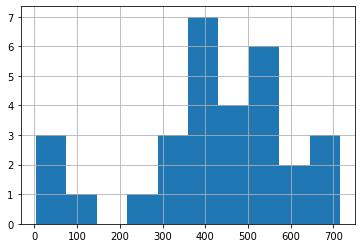

In [23]:
SAA_proton_count_rates.apply(lambda x:x.n).hist()

In [24]:
np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)

10103.190000000002

In [25]:
spectrum_row[2:].values

array([780.0000000000002, 779.9999999999998, 240.00000000000006,
       229.99999999999991, 430.0000000000001, 420.0000000000001,
       230.00000000000006, 279.99999999999994, 91.20000000000073,
       90.20000000000073, 127.0, 125.29999999999927, 182.29999999999927,
       178.90000000000146, 173.0, 175.39999999999964, 209.12000000000006,
       107.27999999999993, 84.36000000000004, 53.48999999999997,
       48.88000000000002, 43.93000000000002, 39.280000000000015,
       32.746666666666655, 23.858, 15.412000000000003, 8.163599999999999,
       3.4247], dtype=object)

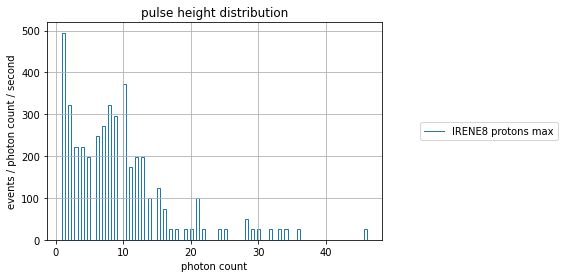

In [26]:
IRENE8_proton_max_run.plot_pulse_height_distribution()

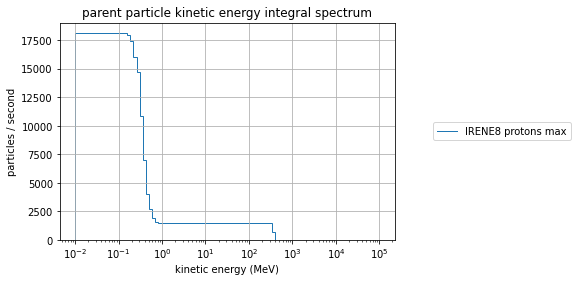

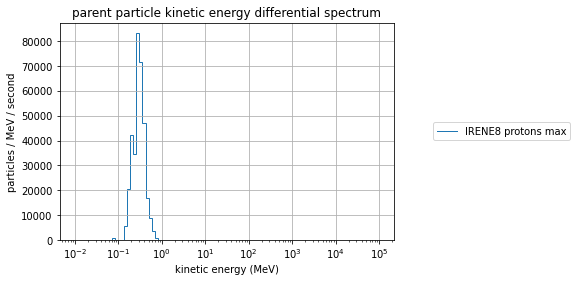

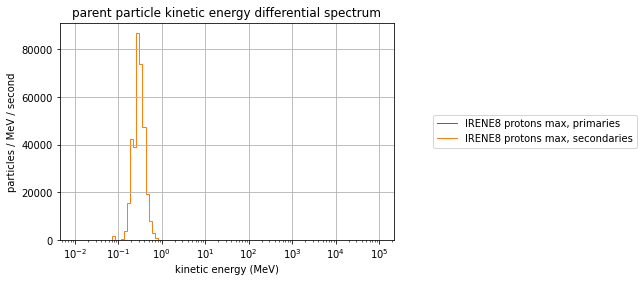

In [27]:
IRENE8_proton_max_run.outputted_tuple.plot_integral_primary_spectra()
plt.figure()
IRENE8_proton_max_run.outputted_tuple.plot_differential_primary_spectra()
plt.figure()
IRENE8_proton_max_run.outputted_tuple.primary_particle_Cherenkov_tuple.plot_differential_primary_spectra()
IRENE8_proton_max_run.outputted_tuple.secondary_particle_Cherenkov_tuple.plot_differential_primary_spectra()

In [28]:
IRENE8_proton_max_run.outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=10.0)

779.7273561798623+/-93.19524435868404

In [29]:
IRENE8_450_protons

,Latitude_deg,Longitude_deg,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,...,30,40,50,60,70,100,150,200,300,400
0,0.000000,354.938757,3519.5,3504.1,3488.7,3475.4,3462.1,3454.2,3446.3,3433.0,...,2518.5,2347.60,2188.30,2031.70,1895.40,1531.80,1041.00,707.42,306.64,132.920
1,3.313331,354.688073,3141.3,3132.8,3124.2,3116.3,3108.4,3103.5,3098.7,3090.8,...,2391.8,2236.00,2090.30,1951.90,1828.90,1496.40,1042.50,726.23,326.90,147.150
2,6.626412,354.437390,2742.0,2735.6,2729.2,2722.8,2716.5,2713.4,2710.2,2703.9,...,2159.3,2025.00,1899.10,1778.70,1671.70,1378.60,971.83,685.09,312.98,142.980
3,9.939000,354.186707,2032.5,2024.1,2015.7,2007.3,1999.0,1996.7,1994.3,1985.9,...,1613.9,1523.00,1437.10,1345.80,1268.50,1051.80,740.84,521.84,233.21,104.220
4,13.250860,353.936025,1320.5,1316.1,1311.8,1307.1,1302.4,1297.0,1291.6,1283.5,...,1050.0,991.75,936.75,881.96,831.92,691.92,480.22,333.29,140.57,59.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,-13.371240,82.192904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000
1089,-10.059640,81.942378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000
1090,-6.747288,81.691850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000
1091,-3.434439,81.441319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000


In [48]:
(spacecraft_coords_DF["ModifiedJulianDay"].iloc[790:850].iloc[-1] - spacecraft_coords_DF["ModifiedJulianDay"].iloc[790:850].iloc[0]) * 24 * 60

58.99999679764733

In [30]:
def long_east_to_west(longitude_east):

    if longitude_east > 180:
        output_longitude = longitude_east - 360.0
    else:
        output_longitude = longitude_east

    return output_longitude

<AxesSubplot:xlabel='Longitude_west', ylabel='Latitude_deg'>

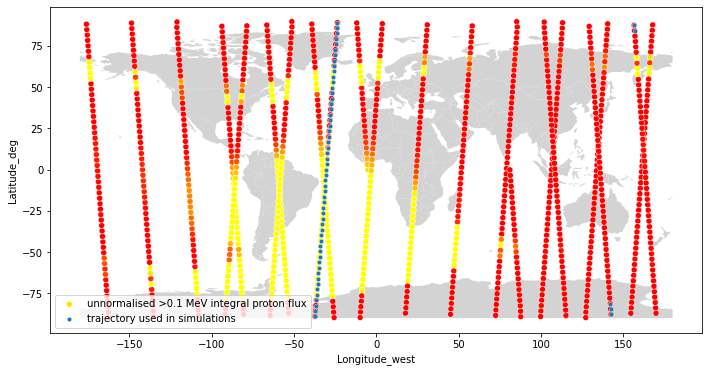

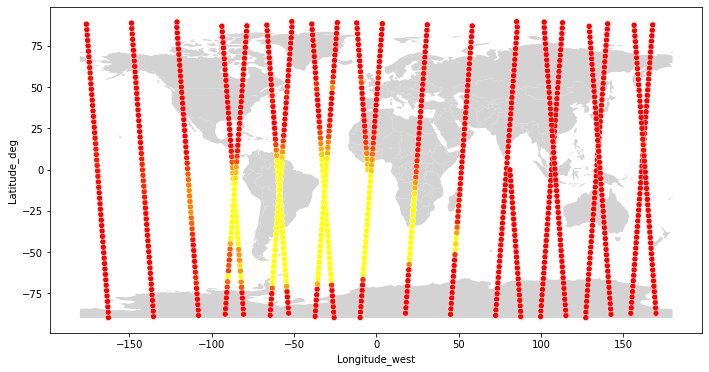

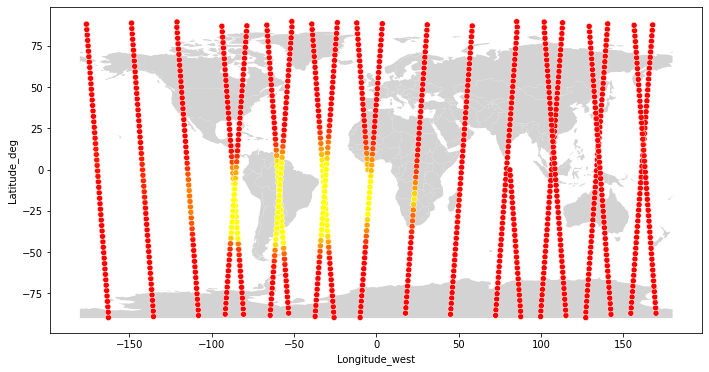

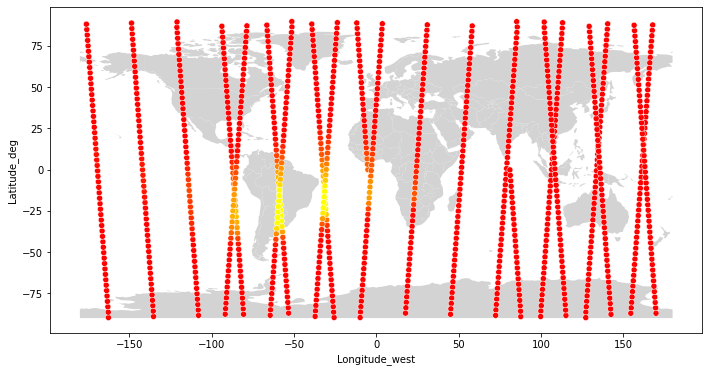

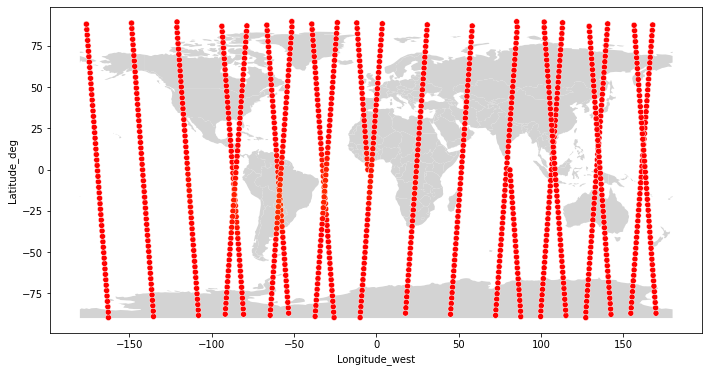

In [31]:
import geopandas as gpd
import seaborn as sns

IRENE8_450_protons_west = IRENE8_450_protons.copy()
IRENE8_450_protons_west["Longitude_west"] = IRENE8_450_protons_west["Longitude_deg"].apply(long_east_to_west)

worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)
sns.scatterplot(data=IRENE8_450_protons_west,x="Longitude_west",y="Latitude_deg",ax=ax,marker="o",c=IRENE8_450_protons_west[0.1],vmin=0,vmax=4000,cmap="autumn",label="unnormalised >0.1 MeV integral proton flux")
sns.scatterplot(data=IRENE8_450_protons_west.iloc[790:850],x="Longitude_west",y="Latitude_deg",ax=ax,marker="o",s=20,label="trajectory used in simulations")
plt.legend()
#plt.scatter(x=[-2.6360864e+01],y=[5.3032820e+01])

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)
sns.scatterplot(data=IRENE8_450_protons_west,x="Longitude_west",y="Latitude_deg",ax=ax,marker="o",c=IRENE8_450_protons_west[1],vmin=0,vmax=4000,cmap="autumn")

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)
sns.scatterplot(data=IRENE8_450_protons_west,x="Longitude_west",y="Latitude_deg",ax=ax,marker="o",c=IRENE8_450_protons_west[10],vmin=0,vmax=4000,cmap="autumn")

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)
sns.scatterplot(data=IRENE8_450_protons_west,x="Longitude_west",y="Latitude_deg",ax=ax,marker="o",c=IRENE8_450_protons_west[100],vmin=0,vmax=4000,cmap="autumn")

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)
sns.scatterplot(data=IRENE8_450_protons_west,x="Longitude_west",y="Latitude_deg",ax=ax,marker="o",c=IRENE8_450_protons_west[300],vmin=0,vmax=4000,cmap="autumn")

In [42]:
IRENE8_450_protons_west.iloc[790:850]

,Latitude_deg,Longitude_deg,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,...,40,50,60,70,100,150,200,300,400,Longitude_west
790,84.296290,156.896069,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,156.896069
791,87.573710,156.643162,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,...,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,156.643162
792,89.148900,336.407396,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,...,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-23.592604
793,85.871300,336.147949,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,...,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-23.852051
794,82.593220,335.896262,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,...,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-24.103738
795,79.314430,335.645192,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,...,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-1.000000e+20,-24.354808
796,76.034690,335.394306,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-24.605694
797,72.753770,335.143498,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-24.856502
798,69.471460,334.892732,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-25.107268
799,66.187560,334.641989,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-25.358011


In [32]:
proton_time_and_coords = pd.concat([spacecraft_coords_DF,IRENE8_450_protons_west],axis=1)
proton_time_and_coords

,ModifiedJulianDay,Altitude_km,Latitude_deg,Longitude_deg,LocalTime_hrs,PitchAngle_deg,Latitude_deg,Longitude_deg,0.1,0.15,...,40,50,60,70,100,150,200,300,400,Longitude_west
0,18628.000000,1192.835,0.000000,354.938757,23.662584,90.0,0.000000,354.938757,3519.5,3504.1,...,2347.60,2188.30,2031.70,1895.40,1531.80,1041.00,707.42,306.64,132.920,-5.061243
1,18628.000694,1192.891,3.313331,354.688073,23.662538,90.0,3.313331,354.688073,3141.3,3132.8,...,2236.00,2090.30,1951.90,1828.90,1496.40,1042.50,726.23,326.90,147.150,-5.311927
2,18628.001389,1193.060,6.626412,354.437390,23.662493,90.0,6.626412,354.437390,2742.0,2735.6,...,2025.00,1899.10,1778.70,1671.70,1378.60,971.83,685.09,312.98,142.980,-5.562610
3,18628.002083,1193.338,9.939000,354.186707,23.662447,90.0,9.939000,354.186707,2032.5,2024.1,...,1523.00,1437.10,1345.80,1268.50,1051.80,740.84,521.84,233.21,104.220,-5.813293
4,18628.002778,1193.722,13.250860,353.936025,23.662402,90.0,13.250860,353.936025,1320.5,1316.1,...,991.75,936.75,881.96,831.92,691.92,480.22,333.29,140.57,59.285,-6.063975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,18628.755556,1193.970,-13.371240,82.192904,23.612860,90.0,-13.371240,82.192904,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,82.192904
1089,18628.756250,1193.583,-10.059640,81.942378,23.612825,90.0,-10.059640,81.942378,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,81.942378
1090,18628.756944,1193.301,-6.747288,81.691850,23.612790,90.0,-6.747288,81.691850,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,81.691850
1091,18628.757639,1193.129,-3.434439,81.441319,23.612755,90.0,-3.434439,81.441319,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,81.441319


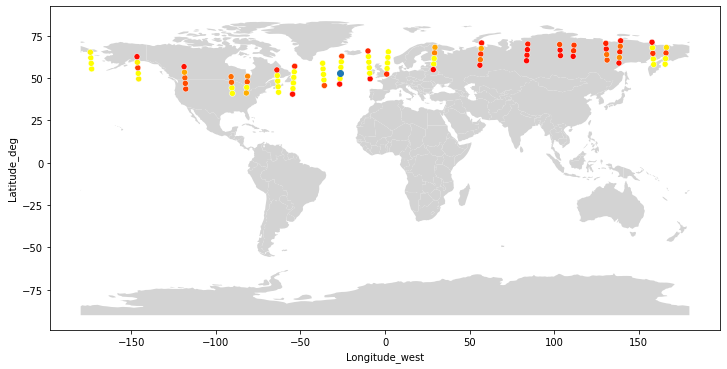

In [33]:


# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)
sns.scatterplot(data=IRENE8_450_protons_west.query("Latitude_deg > 30").query("`0.1` > 100.0"),x="Longitude_west",y="Latitude_deg",ax=ax,marker="o",
                c=IRENE8_450_protons_west.query("Latitude_deg > 30").query("`0.1` > 100.0")[0.1],vmin=0,vmax=4000,cmap="autumn")
plt.scatter(x=[-2.6360864e+01],y=[5.3032820e+01])

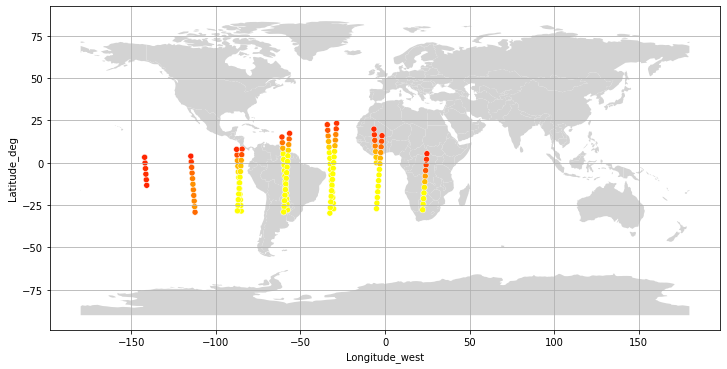

In [34]:
# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)
sns.scatterplot(data=IRENE8_450_protons_west.query("Latitude_deg < 30").query("Latitude_deg >= -30").query("`0.1` > 500.0"),x="Longitude_west",y="Latitude_deg",ax=ax,marker="o",
                c=IRENE8_450_protons_west.query("Latitude_deg < 30").query("Latitude_deg >= -30").query("`0.1` > 500.0")[0.1],vmin=0,vmax=4000,cmap="autumn")
plt.grid()

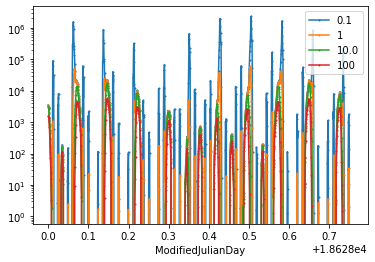

In [35]:
for energy_MeV in [0.1,1,10.0,100]:
    proton_time_and_coords[proton_time_and_coords[energy_MeV] >= 0.0].plot("ModifiedJulianDay",energy_MeV,ax=plt.gca(),marker="o",ms=1)

plt.yscale("log")

In [36]:
energy_for_ratio = 100
np.sum(proton_time_and_coords[energy_for_ratio] > 0.0) / np.sum(proton_time_and_coords[energy_for_ratio] >= 0.0)

0.26973026973026976

In [37]:
np.sum(IRENE8_450_protons.iloc[:,2:]<0)

0.1     92
0.15    92
0.2     92
0.3     92
0.4     92
0.5     92
0.6     92
0.7     92
1       92
1.5     92
2       92
3       92
4       92
5       92
6       92
7       92
10      92
15      92
20      92
30      92
40      92
50      92
60      92
70      92
100     92
150     92
200     92
300     92
400     92
dtype: int64

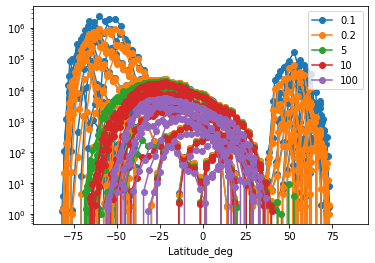

In [38]:
IRENE8_450_protons[IRENE8_450_protons[0.1]>=0].plot(x="Latitude_deg",y=[0.1,0.2,5,10,100],marker="o")
plt.yscale("log")

1.25


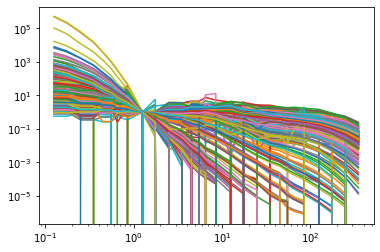

In [39]:
energy_vals = IRENE8_450_protons_differential.iloc[:,2:].columns

for row in IRENE8_450_protons_differential.iloc[:,2:].values:
    try:
        plt.plot(energy_vals,row/row[8])
        plt.xscale("log")
        plt.yscale("log")
    except ZeroDivisionError:
        pass

print(energy_vals[8])

1.25


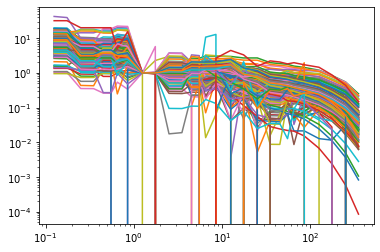

In [40]:
IRENE8_450_protons_differential_SAA = IRENE8_450_protons_differential.query("`Latitude_deg` <= 25").query("`Latitude_deg` >= -25")

energy_vals_SAA = IRENE8_450_protons_differential_SAA.iloc[:,2:].columns

for row in IRENE8_450_protons_differential_SAA.iloc[:,2:].values:
    try:
        plt.plot(energy_vals_SAA,row/row[8])
        plt.xscale("log")
        plt.yscale("log")
    except ZeroDivisionError:
        pass

print(energy_vals[8])

In [41]:
IRENE8_450_protons_differential_horns = IRENE8_450_protons_differential.query("`Latitude_deg` >= 25")

energy_vals_horns = IRENE8_450_protons_differential_horns.iloc[:,2:].columns

for row in IRENE8_450_protons_differential_horns.iloc[:,2:].values:
    try:
        plt.plot(energy_vals_horns,row/row[8])
        plt.xscale("log")
        plt.yscale("log")
    except ZeroDivisionError:
        pass

print(energy_vals[8])

1.25
Error in callback <function flush_figures at 0x7fb51722e0d0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
IRENE8_450_protons

,Latitude_deg,Longitude_deg,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,...,30,40,50,60,70,100,150,200,300,400
0,0.000000,354.938757,3519.5,3504.1,3488.7,3475.4,3462.1,3454.2,3446.3,3433.0,...,2518.5,2347.60,2188.30,2031.70,1895.40,1531.80,1041.00,707.42,306.64,132.920
1,3.313331,354.688073,3141.3,3132.8,3124.2,3116.3,3108.4,3103.5,3098.7,3090.8,...,2391.8,2236.00,2090.30,1951.90,1828.90,1496.40,1042.50,726.23,326.90,147.150
2,6.626412,354.437390,2742.0,2735.6,2729.2,2722.8,2716.5,2713.4,2710.2,2703.9,...,2159.3,2025.00,1899.10,1778.70,1671.70,1378.60,971.83,685.09,312.98,142.980
3,9.939000,354.186707,2032.5,2024.1,2015.7,2007.3,1999.0,1996.7,1994.3,1985.9,...,1613.9,1523.00,1437.10,1345.80,1268.50,1051.80,740.84,521.84,233.21,104.220
4,13.250860,353.936025,1320.5,1316.1,1311.8,1307.1,1302.4,1297.0,1291.6,1283.5,...,1050.0,991.75,936.75,881.96,831.92,691.92,480.22,333.29,140.57,59.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,-13.371240,82.192904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000
1089,-10.059640,81.942378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000
1090,-6.747288,81.691850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000
1091,-3.434439,81.441319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000


In [ ]:
(indexes,counts) = np.unique(IRENE8_450_protons.idxmax(),return_counts=True)
print(np.transpose((indexes,counts)))

[[212  18]
 [615   1]
 [698   1]
 [723   1]
 [724   1]
 [726   3]
 [728   4]
 [833   1]
 [901   1]]


In [ ]:
(indexes_horns,counts_horns) = np.unique(IRENE8_450_protons[IRENE8_450_protons["Latitude_deg"] > 30].idxmax(),return_counts=True)
print(np.transpose((indexes_horns,counts_horns)))

[[ 10   8]
 [119   1]
 [698   1]
 [803   3]
 [804   9]
 [809   8]
 [901   1]]


In [ ]:
max_flux_lats_and_longs = np.array([[index,
    IRENE8_450_protons_differential.iloc[index].Latitude_deg,
    long_east_to_west(IRENE8_450_protons_differential.iloc[index].Longitude_deg)] for index in indexes])
max_flux_lats_and_longs

array([[ 2.1200000e+02, -2.1212820e+01, -5.8206763e+01],
       [ 6.1500000e+02, -4.7601490e+01,  2.0768346e+01],
       [ 6.9800000e+02,  3.9173370e+01, -3.9079000e-02],
       [ 7.2300000e+02, -4.3634030e+01, -6.3061180e+00],
       [ 7.2400000e+02, -4.6932400e+01, -6.5567830e+00],
       [ 7.2600000e+02, -5.3522210e+01, -7.0581010e+00],
       [ 7.2800000e+02, -6.0103110e+01, -7.5593960e+00],
       [ 8.3300000e+02, -4.6265210e+01, -3.3881118e+01],
       [ 9.0100000e+02,  8.9814920e+01, -5.1267526e+01]])

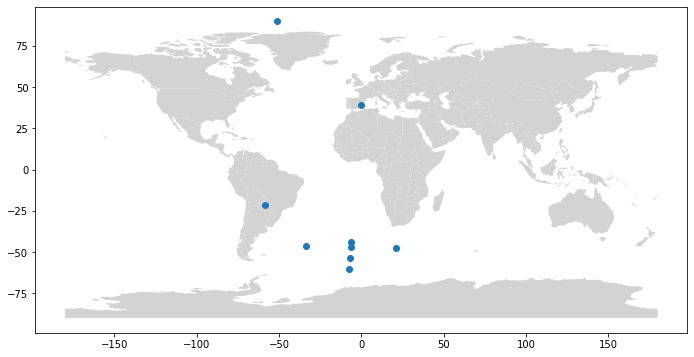

In [ ]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)
plt.plot(max_flux_lats_and_longs[:,2],max_flux_lats_and_longs[:,1],marker="o",ls="None")

In [ ]:
max_flux_lats_and_longs_horns = np.array([[index,
    IRENE8_450_protons_differential.iloc[index].Latitude_deg,
    long_east_to_west(IRENE8_450_protons_differential.iloc[index].Longitude_deg)] for index in indexes_horns])
max_flux_lats_and_longs_horns

array([[ 1.0000000e+01,  3.3094950e+01, -7.5680500e+00],
       [ 1.1900000e+02,  3.2425470e+01, -3.4892516e+01],
       [ 6.9800000e+02,  3.9173370e+01, -3.9079000e-02],
       [ 8.0300000e+02,  5.3032820e+01, -2.6360864e+01],
       [ 8.0400000e+02,  4.9738740e+01, -2.6611562e+01],
       [ 8.0900000e+02,  3.3233800e+01, -2.7865012e+01],
       [ 9.0100000e+02,  8.9814920e+01, -5.1267526e+01]])

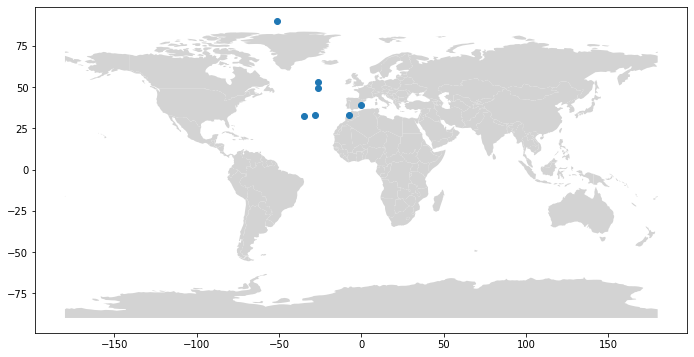

In [ ]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)
plt.plot(max_flux_lats_and_longs_horns[:,2],max_flux_lats_and_longs_horns[:,1],marker="o",ls="None")

In [ ]:
index_to_use = 803

IRENE8_450_protons_differential.iloc[index_to_use][2:].to_csv("IRENE8_450_protons_max.csv",header=None,sep=" ")

proton_max_particles_per_s = np.trapz(IRENE8_450_protons_differential.iloc[index_to_use][2:].values, IRENE8_450_protons_differential.iloc[index_to_use][2:].index)

proton_max_450_IRENE8_spectrum = SRT.particle_spectrum(particle_species=SRT.particle("proton"),
                                        spectrum_file_path="IRENE8_450_protons_max.csv",
                                        incoming_particles_per_s_per_cm2=proton_max_particles_per_s)

IRENE8_proton_max_run_horns = SRT.wrapper_gras_Cherenkov_runner_from_objects(proton_max_450_IRENE8_spectrum,
                                   SRT.default_shielding_geometry,
                                   #SRT.no_shielding_geometry,
                                   Cherenkov_run_label = "IRENE8 protons max",
                                   number_of_particles=1_000_000);

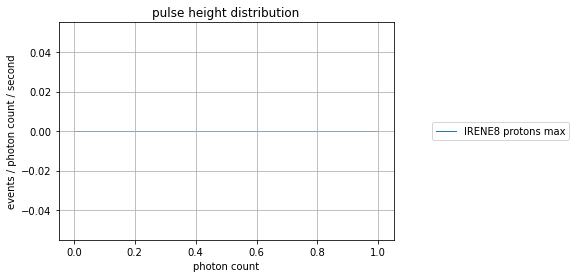

In [ ]:
IRENE8_proton_max_run_horns.plot_pulse_height_distribution()

In [ ]:
IRENE8_proton_max_run_horns.outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=10.0)

0.0+/-7.073690870851309

In [ ]:
total_count_rate_SAA_max = IRENE8_proton_max_run.outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=10.0)
total_count_rate_SAA_max

779.7273561798623+/-93.19524435868404

In [ ]:
scaled_count_rates = total_count_rate_SAA_max * proton_time_and_coords[50]/(proton_time_and_coords[50].iloc[212])
scaled_count_rates

0       184+/-22
1       175+/-21
2       159+/-19
3       121+/-14
4         79+/-9
          ...   
1088     0.0+/-0
1089     0.0+/-0
1090     0.0+/-0
1091     0.0+/-0
1092     0.0+/-0
Name: 50, Length: 1093, dtype: object

In [ ]:
DF_with_SAA_scaled_count_rates = pd.concat([spacecraft_coords_DF,scaled_count_rates.apply(lambda x:x.n).rename("mean_count_rate"),
                                        scaled_count_rates.apply(lambda x:x.std_dev).rename("std_error")],axis=1)
DF_with_SAA_scaled_count_rates

,ModifiedJulianDay,Altitude_km,Latitude_deg,Longitude_deg,LocalTime_hrs,PitchAngle_deg,mean_count_rate,std_error
0,18628.000000,1192.835,0.000000,354.938757,23.662584,90.0,183.727509,21.959637
1,18628.000694,1192.891,3.313331,354.688073,23.662538,90.0,175.499525,20.976205
2,18628.001389,1193.060,6.626412,354.437390,23.662493,90.0,159.446562,19.057509
3,18628.002083,1193.338,9.939000,354.186707,23.662447,90.0,120.657498,14.421329
4,18628.002778,1193.722,13.250860,353.936025,23.662402,90.0,78.648606,9.400306
...,...,...,...,...,...,...,...,...
1088,18628.755556,1193.970,-13.371240,82.192904,23.612860,90.0,0.000000,0.000000
1089,18628.756250,1193.583,-10.059640,81.942378,23.612825,90.0,0.000000,0.000000
1090,18628.756944,1193.301,-6.747288,81.691850,23.612790,90.0,0.000000,0.000000
1091,18628.757639,1193.129,-3.434439,81.441319,23.612755,90.0,0.000000,0.000000


<AxesSubplot:xlabel='ModifiedJulianDay'>

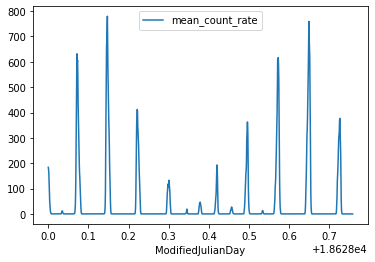

In [ ]:
DF_with_SAA_scaled_count_rates[DF_with_SAA_scaled_count_rates["mean_count_rate"] >= 0.0].plot("ModifiedJulianDay","mean_count_rate")

In [ ]:
sum(DF_with_SAA_scaled_count_rates["mean_count_rate"] >= 10.0)/sum(DF_with_SAA_scaled_count_rates["mean_count_rate"] >= 0.0)

0.2087912087912088

<AxesSubplot:xlabel='Longitude_west', ylabel='Latitude_deg'>

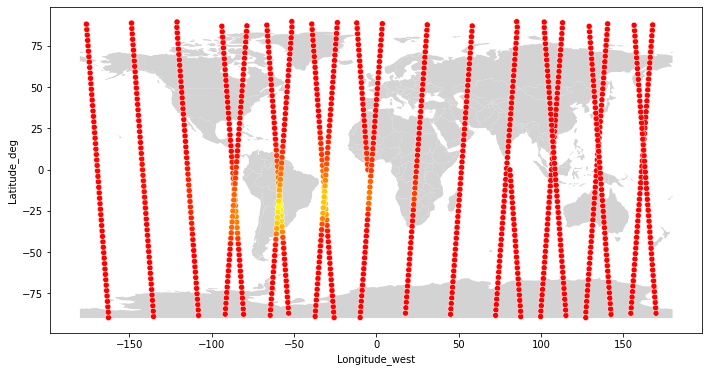

In [ ]:
# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)
sns.scatterplot(data=IRENE8_450_protons_west,x="Longitude_west",y="Latitude_deg",ax=ax,marker="o",c=DF_with_SAA_scaled_count_rates["mean_count_rate"],vmin=0,cmap="autumn")

## Analysing electrons

In [ ]:
IRENE8_450_electrons_differential = convert_integral_values_to_differential(IRENE8_450_electrons)

0.6499999999999999


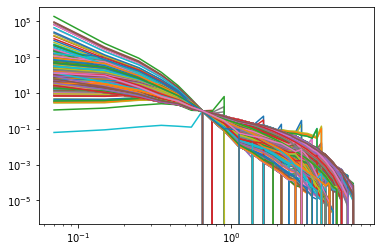

In [ ]:
energy_vals = IRENE8_450_electrons_differential.iloc[:,2:].columns

for row in IRENE8_450_electrons_differential.iloc[:,2:].values:
    try:
        plt.plot(energy_vals,row/row[6])
        plt.xscale("log")
        plt.yscale("log")
    except ZeroDivisionError:
        pass

print(energy_vals[6])

0.9


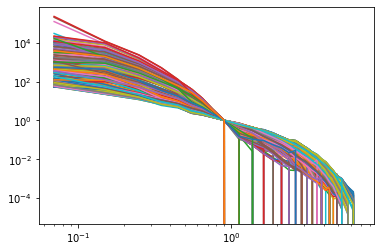

In [ ]:
IRENE8_450_electrons_differential_horns = IRENE8_450_electrons_differential.query("`Latitude_deg` > 25")

energy_vals_SAA = IRENE8_450_electrons_differential_horns.iloc[:,2:].columns

for row in IRENE8_450_electrons_differential_horns.iloc[:,2:].values:
    try:
        plt.plot(energy_vals_SAA,row/row[8])
        plt.xscale("log")
        plt.yscale("log")
    except ZeroDivisionError:
        pass

print(energy_vals[8])

0.9


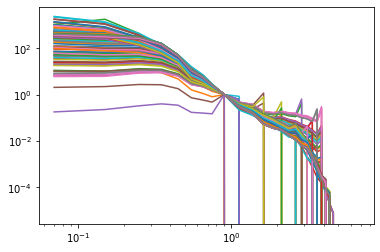

In [ ]:
IRENE8_450_electrons_differential_SAA = IRENE8_450_electrons_differential.query("`Latitude_deg` <= 25").query("`Latitude_deg` >= -25")

energy_vals_SAA = IRENE8_450_electrons_differential_SAA.iloc[:,2:].columns

for row in IRENE8_450_electrons_differential_SAA.iloc[:,2:].values:
    try:
        plt.plot(energy_vals_SAA,row/row[8])
        plt.xscale("log")
        plt.yscale("log")
    except ZeroDivisionError:
        pass

print(energy_vals[8])

In [ ]:
np.unique(IRENE8_450_electrons.idxmax(),return_counts=True)

(array([  0, 209, 616, 698, 727, 728, 901, 937]),
 array([ 2, 15,  3,  1,  4,  5,  1,  1]))

In [ ]:
max_flux_lats_and_longs = np.array([[index,
    IRENE8_450_electrons_differential.iloc[index].Latitude_deg,
    long_east_to_west(IRENE8_450_electrons_differential.iloc[index].Longitude_deg)] for index in indexes])
max_flux_lats_and_longs

array([[ 2.1200000e+02, -2.1212820e+01, -5.8206763e+01],
       [ 6.1500000e+02, -4.7601490e+01,  2.0768346e+01],
       [ 6.9800000e+02,  3.9173370e+01, -3.9079000e-02],
       [ 7.2300000e+02, -4.3634030e+01, -6.3061180e+00],
       [ 7.2400000e+02, -4.6932400e+01, -6.5567830e+00],
       [ 7.2600000e+02, -5.3522210e+01, -7.0581010e+00],
       [ 7.2800000e+02, -6.0103110e+01, -7.5593960e+00],
       [ 8.3300000e+02, -4.6265210e+01, -3.3881118e+01],
       [ 9.0100000e+02,  8.9814920e+01, -5.1267526e+01]])

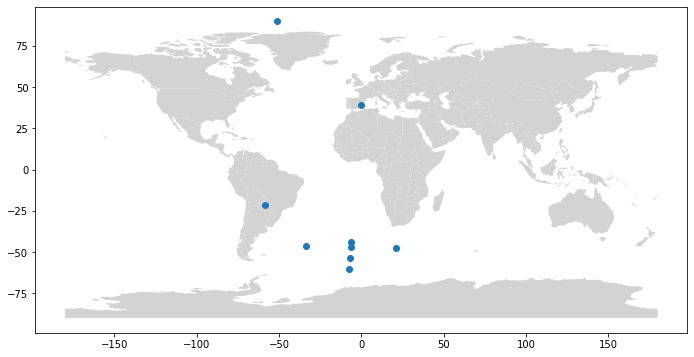

In [ ]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)
plt.plot(max_flux_lats_and_longs[:,2],max_flux_lats_and_longs[:,1],marker="o",ls="None")

In [ ]:
max_flux_lats_and_longs_horns = np.array([[index,
    IRENE8_450_electrons_differential.iloc[index].Latitude_deg,
    long_east_to_west(IRENE8_450_electrons_differential.iloc[index].Longitude_deg)] for index in indexes_horns])
max_flux_lats_and_longs_horns

array([[ 1.0000000e+01,  3.3094950e+01, -7.5680500e+00],
       [ 1.1900000e+02,  3.2425470e+01, -3.4892516e+01],
       [ 6.9800000e+02,  3.9173370e+01, -3.9079000e-02],
       [ 8.0300000e+02,  5.3032820e+01, -2.6360864e+01],
       [ 8.0400000e+02,  4.9738740e+01, -2.6611562e+01],
       [ 8.0900000e+02,  3.3233800e+01, -2.7865012e+01],
       [ 9.0100000e+02,  8.9814920e+01, -5.1267526e+01]])

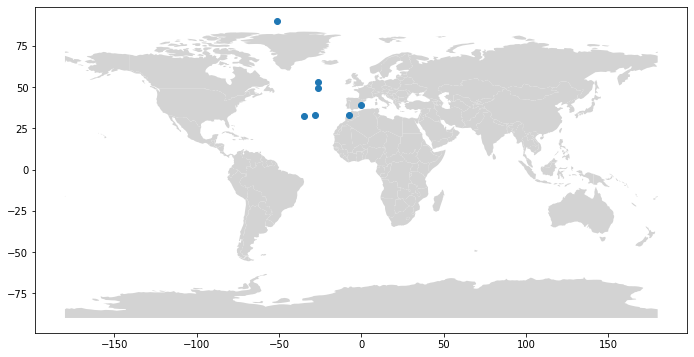

In [ ]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)
plt.plot(max_flux_lats_and_longs_horns[:,2],max_flux_lats_and_longs_horns[:,1],marker="o",ls="None")

In [ ]:
IRENE8_450_electrons.iloc[209]

Latitude_deg    -3.113073e+01
Longitude_deg    3.025450e+02
0.04             6.539200e+07
0.1              4.776400e+07
0.2              2.298100e+07
0.3              9.915900e+06
0.4              3.837100e+06
0.5              1.484800e+06
0.6              9.988800e+05
0.7              6.719800e+05
0.8              4.765100e+05
1                2.662400e+05
1.25             1.622300e+05
1.5              9.885500e+04
1.75             6.518100e+04
2                4.297700e+04
2.25             2.940400e+04
2.5              2.011700e+04
2.75             8.208000e+03
3                3.348900e+03
3.25             9.881400e+02
3.5              2.915600e+02
3.75             8.608900e+01
4                2.541900e+01
4.25             7.089700e+00
4.5              1.977400e+00
4.75             0.000000e+00
5                0.000000e+00
5.5              0.000000e+00
6                0.000000e+00
6.5              0.000000e+00
7                0.000000e+00
Name: 209, dtype: float64

In [ ]:
IRENE8_450_electrons_differential.iloc[209][2:].to_csv("IRENE8_450_electrons_max.csv",header=None,sep=" ")

In [ ]:
electron_max_particles_per_s = np.trapz(IRENE8_450_electrons_differential.iloc[209][2:].values, IRENE8_450_electrons_differential.iloc[209][2:].index)
electron_max_particles_per_s

57068225.125

In [ ]:
electron_max_450_IRENE8_spectrum = SRT.particle_spectrum(particle_species=SRT.particle("e-"),
                                        spectrum_file_path="IRENE8_450_electrons_max.csv",
                                        incoming_particles_per_s_per_cm2=electron_max_particles_per_s)

In [ ]:
IRENE8_electron_max_run = SRT.wrapper_gras_Cherenkov_runner_from_objects(electron_max_450_IRENE8_spectrum,
                                   SRT.default_shielding_geometry,
                                   Cherenkov_run_label = "IRENE8 electrons max",
                                   number_of_particles=1_000_000);

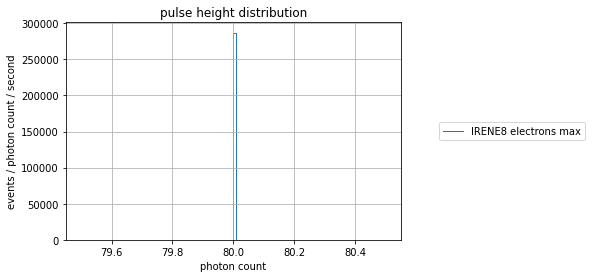

In [ ]:
IRENE8_electron_max_run.plot_pulse_height_distribution()

In [ ]:
IRENE8_electron_max_run.outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=10.0)

2868.561868897735+/-2868.561868897735

In [ ]:
index_to_use = 803

IRENE8_450_electrons_differential.iloc[index_to_use][2:].to_csv("IRENE8_450_electrons_max.csv",header=None,sep=" ")

electron_max_particles_per_s = np.trapz(IRENE8_450_electrons_differential.iloc[index_to_use][2:].values, 
    IRENE8_450_electrons_differential.iloc[index_to_use][2:].index)

electron_max_450_IRENE8_spectrum = SRT.particle_spectrum(particle_species=SRT.particle("e-"),
                                        spectrum_file_path="IRENE8_450_electrons_max.csv",
                                        incoming_particles_per_s_per_cm2=electron_max_particles_per_s)

IRENE8_electron_max_run_horns = SRT.wrapper_gras_Cherenkov_runner_from_objects(electron_max_450_IRENE8_spectrum,
                                   SRT.default_shielding_geometry,
                                   Cherenkov_run_label = "IRENE8 electrons max",
                                   number_of_particles=10_000_000);

________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7febdbfa3ac0>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7febeaa872e0>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=10000000)


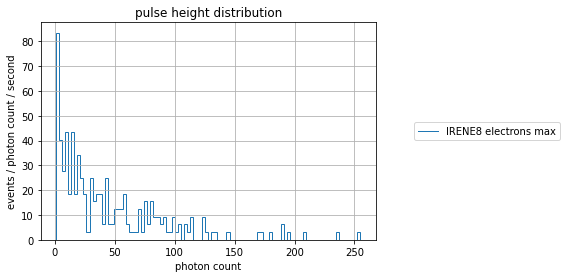

In [ ]:
IRENE8_electron_max_run_horns.plot_pulse_height_distribution()

In [ ]:
IRENE8_electron_max_run_horns.outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=10.0)

1412.8239693074943+/-105.3056811870878

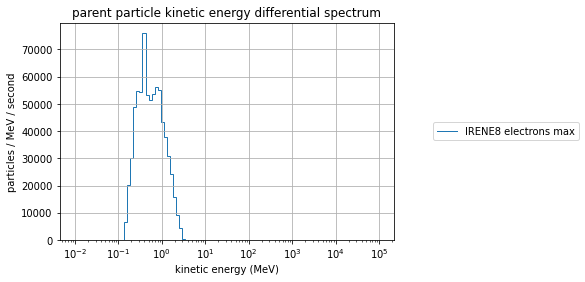

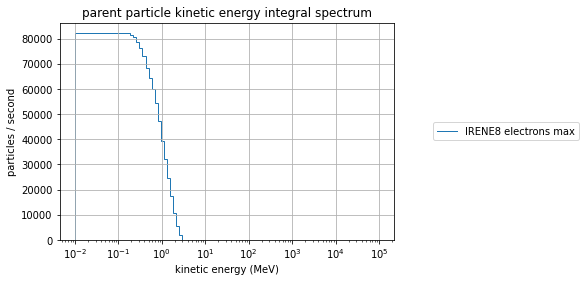

In [ ]:
IRENE8_electron_max_run_horns.outputted_tuple.plot_differential_primary_spectra()
plt.figure()
IRENE8_electron_max_run_horns.outputted_tuple.plot_integral_primary_spectra()

In [ ]:
IRENE8_450_electrons.iloc[index_to_use]

Latitude_deg     5.303282e+01
Longitude_deg    3.336391e+02
0.04             1.863800e+06
0.1              1.111200e+06
0.2              5.702900e+05
0.3              3.515400e+05
0.4              2.602600e+05
0.5              1.926800e+05
0.6              1.545700e+05
0.7              1.240000e+05
0.8              1.013300e+05
1                7.022100e+04
1.25             4.905800e+04
1.5              3.427300e+04
1.75             2.434500e+04
2                1.729400e+04
2.25             1.200400e+04
2.5              8.332200e+03
2.75             5.714900e+03
3                3.919700e+03
3.25             2.529000e+03
3.5              1.631800e+03
3.75             9.657400e+02
4                5.715600e+02
4.25             3.088700e+02
4.5              1.669100e+02
4.75             8.745700e+01
5                4.582300e+01
5.5              1.016800e+01
6                2.037100e+00
6.5              0.000000e+00
7                0.000000e+00
Name: 803, dtype: float64

In [ ]:
IRENE8_450_electrons_differential.iloc[index_to_use]

Latitude_deg                  53.03282
Longitude_deg               333.639136
0.07                   12543333.333333
0.15000000000000002          5409100.0
0.25                         2187500.0
0.35                          912800.0
0.45                          675800.0
0.55                          381100.0
0.6499999999999999            305700.0
0.75                          226700.0
0.9                           155545.0
1.125                          84652.0
1.375                          59140.0
1.625                          39712.0
1.875                          28204.0
2.125                          21160.0
2.375                          14687.2
2.625                          10469.2
2.875                           7180.8
3.125                           5562.8
3.375                           3588.8
3.625                          2664.24
3.875                          1576.72
4.125                          1050.76
4.375                           567.84
4.625                    

In [ ]:
IRENE8_450_electrons_differential_shortened = IRENE8_450_electrons_differential.drop(columns=IRENE8_450_electrons_differential.columns[2:11])
IRENE8_450_electrons_differential_shortened

,Latitude_deg,Longitude_deg,1.125,1.375,1.625,1.875,2.125,2.375,2.625,2.875,...,3.625,3.875,4.125,4.375,4.625,4.875,5.25,5.75,6.25,6.75
0,0.000000,354.938757,5039.2,2607.72,922.28,618.24,504.52,302.04,199.78,111.164,...,18.7532,6.55,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1,3.313331,354.688073,2716.08,1416.32,498.24,337.44,286.28,170.52,113.232,62.176,...,11.3468,6.1536,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2,6.626412,354.437390,1774.0,945.88,337.76,232.16,201.908,122.04,82.488,45.996,...,7.4096,7.7612,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
3,9.939000,354.186707,1300.24,692.28,246.88,169.56,147.344,88.964,60.068,33.452,...,5.3692,5.6092,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
4,13.250860,353.936025,725.48,378.56,133.744,90.44,76.012,45.424,30.2536,16.6852,...,4.7284,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,-13.371240,82.192904,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1089,-10.059640,81.942378,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1090,-6.747288,81.691850,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1091,-3.434439,81.441319,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [ ]:
IRENE8_450_electrons_differential_shortened

,Latitude_deg,Longitude_deg,1.125,1.375,1.625,1.875,2.125,2.375,2.625,2.875,...,3.625,3.875,4.125,4.375,4.625,4.875,5.25,5.75,6.25,6.75
0,0.000000,354.938757,5039.2,2607.72,922.28,618.24,504.52,302.04,199.78,111.164,...,18.7532,6.55,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1,3.313331,354.688073,2716.08,1416.32,498.24,337.44,286.28,170.52,113.232,62.176,...,11.3468,6.1536,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2,6.626412,354.437390,1774.0,945.88,337.76,232.16,201.908,122.04,82.488,45.996,...,7.4096,7.7612,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
3,9.939000,354.186707,1300.24,692.28,246.88,169.56,147.344,88.964,60.068,33.452,...,5.3692,5.6092,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
4,13.250860,353.936025,725.48,378.56,133.744,90.44,76.012,45.424,30.2536,16.6852,...,4.7284,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,-13.371240,82.192904,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1089,-10.059640,81.942378,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1090,-6.747288,81.691850,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1091,-3.434439,81.441319,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [ ]:
index_to_use = 803

IRENE8_450_electrons_differential_shortened.iloc[index_to_use][2:].to_csv("IRENE8_450_electrons_max.csv",header=None,sep=" ")

electron_max_particles_per_s = np.trapz(IRENE8_450_electrons_differential_shortened.iloc[index_to_use][2:].values, 
    IRENE8_450_electrons_differential_shortened.iloc[index_to_use][2:].index)

electron_max_450_IRENE8_spectrum = SRT.particle_spectrum(particle_species=SRT.particle("e-"),
                                        spectrum_file_path="IRENE8_450_electrons_max.csv",
                                        incoming_particles_per_s_per_cm2=electron_max_particles_per_s)

IRENE8_electron_max_run_horns_shortened = SRT.wrapper_gras_Cherenkov_runner_from_objects(electron_max_450_IRENE8_spectrum,
                                   SRT.default_shielding_geometry,
                                   Cherenkov_run_label = "IRENE8 electrons max",
                                   number_of_particles=100_000);

________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f533f576460>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)
successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 30.4s, 0.5min


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

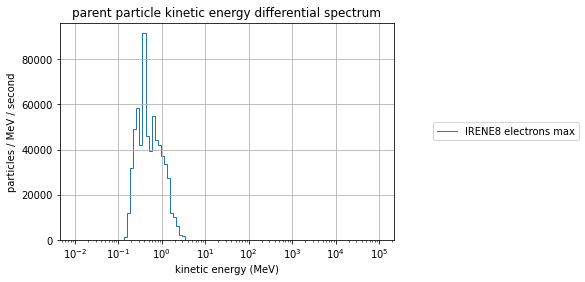

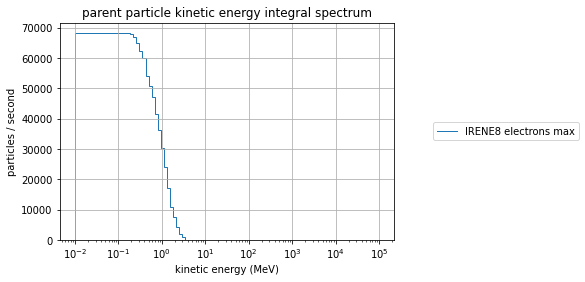

In [ ]:
IRENE8_electron_max_run_horns_shortened.outputted_tuple.plot_differential_primary_spectra()
plt.figure()
IRENE8_electron_max_run_horns_shortened.outputted_tuple.plot_integral_primary_spectra()

In [ ]:
IRENE8_electron_max_run_horns_shortened.outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=10.0)

1199.2429609289304+/-189.61696122298684

In [ ]:
IRENE8_450_electrons_west = IRENE8_450_electrons.copy()
IRENE8_450_electrons_west["Longitude_west"] = IRENE8_450_electrons_west["Longitude_deg"].apply(long_east_to_west)

In [ ]:
IRENE8_450_electrons_west.columns

Index([  'Latitude_deg',  'Longitude_deg',             0.04,              0.1,
                    0.2,              0.3,              0.4,              0.5,
                    0.6,              0.7,              0.8,                1,
                   1.25,              1.5,             1.75,                2,
                   2.25,              2.5,             2.75,                3,
                   3.25,              3.5,             3.75,                4,
                   4.25,              4.5,             4.75,                5,
                    5.5,                6,              6.5,                7,
       'Longitude_west'],
      dtype='object')

In [ ]:
IRENE8_450_electrons_west[1.25].max()

162230.0

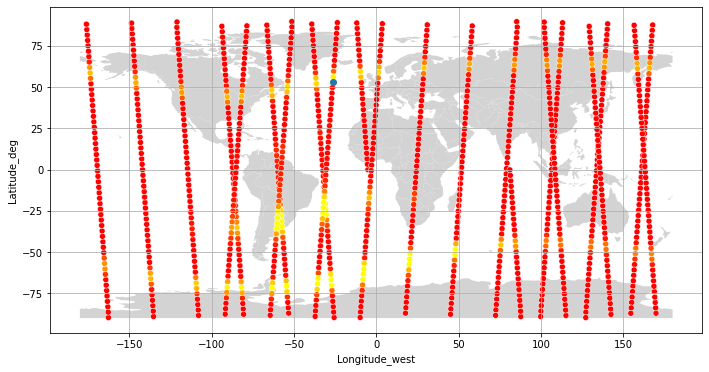

In [ ]:
# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)
sns.scatterplot(data=IRENE8_450_electrons_west,x="Longitude_west",y="Latitude_deg",ax=ax,marker="o",
                c=IRENE8_450_electrons_west[1.25],vmin=0,vmax=70_000,cmap="autumn")
plt.scatter(x=[-2.6360864e+01],y=[5.3032820e+01])
plt.grid()

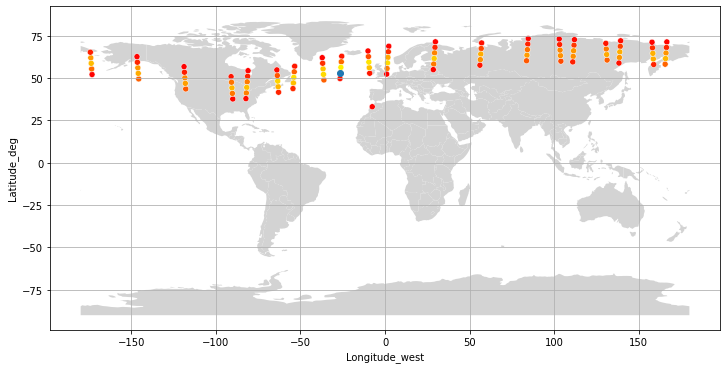

In [ ]:
# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)
sns.scatterplot(data=IRENE8_450_electrons_west.query("Latitude_deg >= 30").query("`1.25` > 500.0"),x="Longitude_west",y="Latitude_deg",ax=ax,marker="o",
                c=IRENE8_450_electrons_west.query("Latitude_deg >= 30").query("`1.25` > 500.0")[1.25],vmin=0,vmax=70_000,cmap="autumn")
plt.scatter(x=[-2.6360864e+01],y=[5.3032820e+01])
plt.grid()

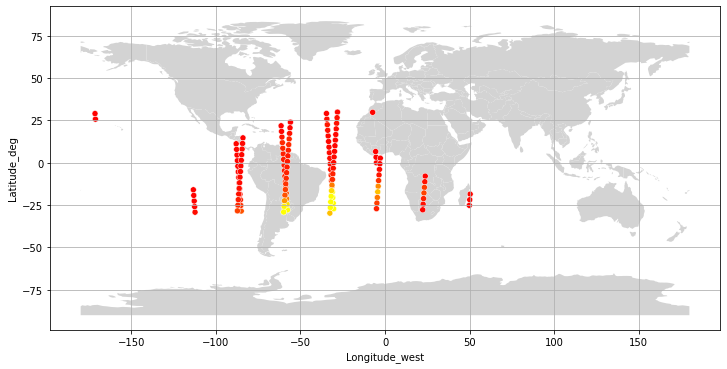

In [ ]:
# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)
sns.scatterplot(data=IRENE8_450_electrons_west.query("Latitude_deg < 30")
                                              .query("Latitude_deg >= -30")
                                              .query("Longitude_deg >= -150")
                                              .query("`1.25` > 500.0"),x="Longitude_west",y="Latitude_deg",ax=ax,marker="o",
                c=IRENE8_450_electrons_west.query("Latitude_deg < 30")
                                           .query("Latitude_deg >= -30")
                                           .query("Longitude_deg >= -150")
                                           .query("`1.25` > 500.0")[1.25],vmin=0,vmax=70_000,cmap="autumn")
#plt.scatter(x=[-2.6360864e+01],y=[5.3032820e+01])
plt.grid()

In [ ]:
IRENE8_450_electrons_differential_SAA_only = IRENE8_450_electrons_differential_shortened.query("Latitude_deg < 30") \
                                           .query("Latitude_deg >= -30") \
                                           .query("Longitude_deg >= -150") \
                                           .query("`1.125` > 500.0").sample(30,random_state=1)
IRENE8_450_electrons_differential_SAA_only
IRENE8_electron_run_dict = {}

for index, spectrum_row in IRENE8_450_electrons_differential_SAA_only.iterrows():

    file_path_to_use = f"IRENE8_450_electrons_{spectrum_row.Latitude_deg}_{spectrum_row.Longitude_deg}.csv"

    spectrum_row[2:].to_csv(file_path_to_use,header=None,sep=" ")

    electron_max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)

    electron_450_IRENE8_spectrum = SRT.particle_spectrum(particle_species=SRT.particle("e-"),
                                            spectrum_file_path=file_path_to_use,
                                            incoming_particles_per_s_per_cm2=electron_max_particles_per_s)
                                            
    IRENE8_electron_run_dict[index] = SRT.wrapper_gras_Cherenkov_runner_from_objects(electron_450_IRENE8_spectrum,
                                    SRT.default_shielding_geometry,
                                    #SRT.no_shielding_geometry,
                                    Cherenkov_run_label = "IRENE8 electrons max",
                                    number_of_particles=100_000);

________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f2cac7c0>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)
successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 29.9s, 0.5min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f2cee280>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_r

/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 31.0s, 0.5min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f2ceef70>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 32.4s, 0.5min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f2cac7c0>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 42.8s, 0.7min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f2cee280>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 39.6s, 0.7min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f53393d2040>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 36.1s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f53393c4dc0>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 36.6s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f2cac580>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 33.7s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f2cac7c0>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 33.2s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f53393d9940>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 33.5s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f5339389f70>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 34.3s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f53393c10a0>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 32.7s, 0.5min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f5339394970>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 33.0s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f2cac580>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 32.8s, 0.5min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f2b6c5b0>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 33.5s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f5339389f70>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 33.7s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f53393ca790>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 33.2s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f53393fa5b0>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 33.3s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f2b6cfa0>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 32.8s, 0.5min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f2bd1340>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 32.9s, 0.5min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f533939fee0>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 33.8s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f53393bd0a0>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 32.9s, 0.5min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f2bd1340>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 32.9s, 0.5min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f5339387250>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 32.9s, 0.5min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f53393a74f0>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 34.0s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f5339368a90>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 34.0s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f53393db400>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 33.8s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f53393aa5e0>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 32.3s, 0.5min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f2bd1340>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 33.7s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f5339376700>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 34.2s, 0.6min


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

In [ ]:
SAA_electron_count_rates = pd.Series(IRENE8_electron_run_dict).apply(lambda x:x.outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=10.0))

In [ ]:
SAA_electron_count_rates

224           1.2+/-1.2
497           3.0+/-1.7
109              14+/-6
937     (4.1+/-1.9)e+02
330           2.6+/-1.8
7           0.35+/-0.20
107               8+/-8
822             43+/-19
219             22+/-11
715     (1.4+/-0.7)e+02
325           3.8+/-2.7
606             60+/-27
609           1.7+/-1.2
605             43+/-22
321               6+/-6
927              14+/-8
215             10+/-10
213             46+/-27
217             17+/-10
331           3.5+/-2.0
934             65+/-33
713             50+/-23
112           2.7+/-1.9
319             64+/-32
813           6.4+/-3.2
1040          1.9+/-1.9
930               7+/-7
923           3.2+/-3.2
718              12+/-8
322               4+/-4
dtype: object

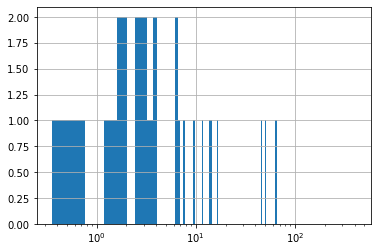

In [ ]:
SAA_electron_count_rates.apply(lambda x:x.n).hist(bins=1000)
plt.xscale("log")

In [ ]:
IRENE8_450_electrons_differential_horns_only = IRENE8_450_electrons_differential_shortened.query("Latitude_deg >= 30").query("`1.125` > 500.0").sample(30,random_state=1)
IRENE8_450_electrons_differential_horns_only
IRENE8_electron_run_dict_horns = {}

for index, spectrum_row in IRENE8_450_electrons_differential_horns_only.iterrows():

    file_path_to_use = f"IRENE8_450_electrons_{spectrum_row.Latitude_deg}_{spectrum_row.Longitude_deg}.csv"

    spectrum_row[2:].to_csv(file_path_to_use,header=None,sep=" ")

    electron_max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)

    electron_450_IRENE8_spectrum = SRT.particle_spectrum(particle_species=SRT.particle("e-"),
                                            spectrum_file_path=file_path_to_use,
                                            incoming_particles_per_s_per_cm2=electron_max_particles_per_s)
                                            
    IRENE8_electron_run_dict_horns[index] = SRT.wrapper_gras_Cherenkov_runner_from_objects(electron_450_IRENE8_spectrum,
                                    SRT.default_shielding_geometry,
                                    #SRT.no_shielding_geometry,
                                    Cherenkov_run_label = "IRENE8 electrons max",
                                    number_of_particles=100_000);

________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f53393aa5e0>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)
successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 29.8s, 0.5min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f125baf0>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_r

/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 31.3s, 0.5min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f12ba580>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 33.4s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f12caf10>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 35.5s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f7aa32b0>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 34.2s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f06f8310>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 33.2s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f071efa0>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 32.9s, 0.5min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f06a28e0>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 33.5s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f06f8a90>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 33.1s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f0702c10>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 33.9s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f06b1c70>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 33.2s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f068fd30>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 33.2s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f063ed00>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 33.2s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f065ed00>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 33.1s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f0702c10>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 33.1s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f06707c0>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 33.1s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f0644af0>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 34.5s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f06a0d60>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 35.0s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f065c1f0>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 33.6s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f06a2d30>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 33.4s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f754df40>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 34.5s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f06502b0>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 33.5s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f75698e0>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 33.1s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f064c250>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 33.7s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f7542490>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 34.1s, 0.6min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f754a280>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 31.7s, 0.5min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f757a550>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 29.1s, 0.5min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f750d070>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 28.8s, 0.5min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f75168e0>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 28.8s, 0.5min
________________________________________________________________________________
[Memory] Calling spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<spectra_running_tools.particle_spectrum object at 0x7f52f75572e0>, <spectra_running_tools.spacecraft_shielding_geometry object at 0x7f534d59a160>, Cherenkov_run_label='IRENE8 electrons max', number_of_particles=100000)


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
______________________wrapper_gras_Cherenkov_runner_from_objects - 28.8s, 0.5min


/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp

In [ ]:
horns_electron_count_rates = pd.Series(IRENE8_electron_run_dict_horns).apply(lambda x:x.outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=10.0))
horns_electron_count_rates

804             79+/-16
469         0.08+/-0.08
474            108+/-20
1024    (6.1+/-1.4)e+02
676         0.35+/-0.35
364     (6.2+/-1.0)e+02
251           5.4+/-3.1
693     (7.9+/-1.3)e+02
449           3.5+/-0.8
892     (7.0+/-1.1)e+02
891           4.6+/-1.1
893     (6.3+/-1.3)e+02
16             109+/-21
784     (5.1+/-1.3)e+02
1005          2.5+/-1.1
471     (1.0+/-0.4)e+02
1025    (8.7+/-1.4)e+02
910         0.17+/-0.17
580             35+/-16
562     (7.5+/-1.5)e+02
1004            51+/-18
125     (9.8+/-1.9)e+02
896         0.16+/-0.16
915     (2.3+/-0.4)e+02
672     (7.1+/-1.1)e+02
809           1.2+/-0.6
255            197+/-33
362     (1.9+/-0.6)e+02
801     (2.0+/-0.6)e+02
1021          0.7+/-0.7
dtype: object

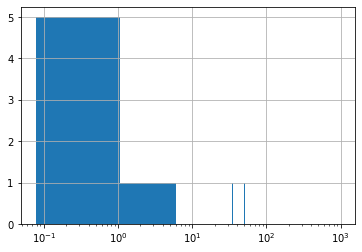

In [ ]:
horns_electron_count_rates.apply(lambda x:x.n).hist(bins=1000)
plt.xscale("log")

In [ ]:
IRENE8_450_electrons_differential_shortened.sample(30,random_state=1)

,Latitude_deg,Longitude_deg,1.125,1.375,1.625,1.875,2.125,2.375,2.625,2.875,...,3.625,3.875,4.125,4.375,4.625,4.875,5.25,5.75,6.25,6.75
101,-27.155730,329.619724,154052.0,99488.0,56992.0,39088.0,26988.0,18450.8,25085.6,9298.8,...,322.696,92.8232,26.7,10.7808,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
180,-53.588700,129.816838,3808.68,1844.48,787.72,425.36,252.312,123.82,43.48,27.604,...,8.1108,11.474,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
159,15.938060,135.079521,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
797,72.753770,335.143498,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
639,-53.603780,194.750034,36356.0,25536.0,18808.0,12942.4,9516.0,6342.0,3978.8,2729.2,...,908.36,601.48,461.12,280.72,150.484,98.664,68.71,19.1194,5.9366,-0.0
395,-42.352570,75.920354,62024.0,43332.0,30256.0,21144.0,14226.8,10100.4,8283.2,5507.2,...,1824.92,1125.0,781.6,443.64,269.348,144.8,64.9646,14.8504,4.331,-0.0
675,65.283510,185.726594,28540.0,15294.0,7582.0,4372.8,2589.2,1473.44,793.2,471.64,...,104.04,55.364,33.0484,15.7392,7.9956,6.3408,-0.0,-0.0,-0.0,-0.0
242,77.804390,294.279678,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
708,6.054317,357.454053,1421.96,772.0,279.8,194.44,171.224,105.0,72.08,40.876,...,6.968,7.5972,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
528,-59.510310,222.574213,25044.0,17788.0,13891.6,9468.4,6780.0,4512.4,2867.6,1952.0,...,624.4,412.8,304.44,189.352,103.38,69.096,48.704,15.4928,5.3492,-0.0


In [ ]:
IRENE8_450_electrons_west

,Latitude_deg,Longitude_deg,0.04,0.1,0.2,0.3,0.4,0.5,0.6,0.7,...,4,4.25,4.5,4.75,5,5.5,6,6.5,7,Longitude_west
0,0.000000,354.938757,1537300.0,1209300.0,750380.0,339930.0,112420.0,37182.0,19539.0,10268.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.061243
1,3.313331,354.688073,729880.0,574970.0,363090.0,168080.0,57040.0,19357.0,10406.0,5594.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.311927
2,6.626412,354.437390,387980.0,307940.0,198260.0,94564.0,33416.0,11808.0,6514.8,3594.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.562610
3,9.939000,354.186707,287760.0,228280.0,146830.0,69917.0,24649.0,8689.6,4788.0,2638.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.813293
4,13.250860,353.936025,201860.0,159250.0,98662.0,45200.0,15312.0,5187.2,2785.8,1496.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.063975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,-13.371240,82.192904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.192904
1089,-10.059640,81.942378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.942378
1090,-6.747288,81.691850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.691850
1091,-3.434439,81.441319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.441319


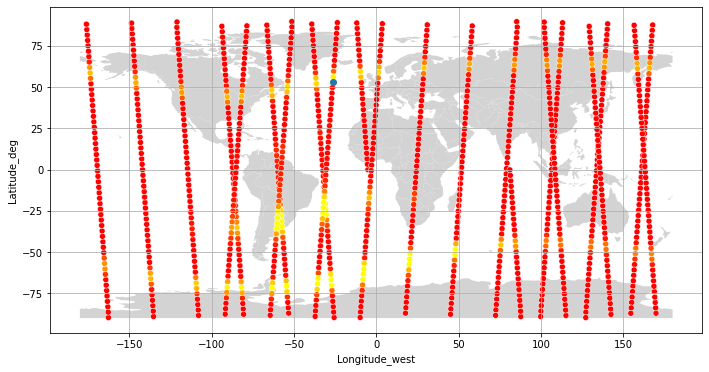

In [ ]:
DF_to_plot = IRENE8_450_electrons_west

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)
sns.scatterplot(data=DF_to_plot,x="Longitude_west",y="Latitude_deg",ax=ax,marker="o",
                c=DF_to_plot[1.25],vmin=0,vmax=70_000,cmap="autumn")
plt.scatter(x=[-2.6360864e+01],y=[5.3032820e+01])
plt.grid()

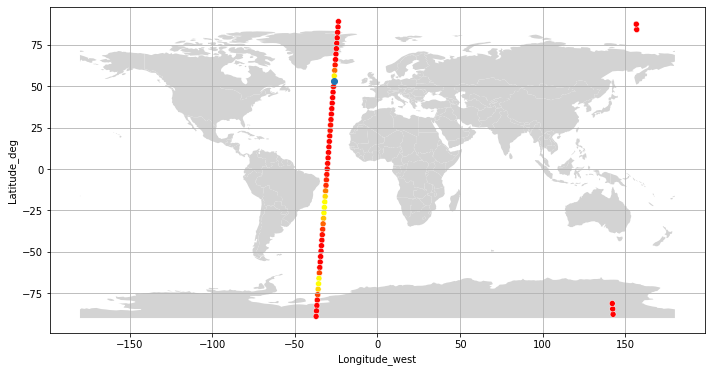

In [ ]:
DF_to_plot = IRENE8_450_electrons_west.iloc[790:850]

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)
sns.scatterplot(data=DF_to_plot,x="Longitude_west",y="Latitude_deg",ax=ax,marker="o",
                c=DF_to_plot[1.25],vmin=0,vmax=70_000,cmap="autumn")
plt.scatter(x=[-2.6360864e+01],y=[5.3032820e+01])
plt.grid()

In [ ]:
from uncertainties import ufloat

IRENE8_450_electrons_differential_oneorbit_only = IRENE8_450_electrons_differential_shortened.iloc[790:850].sample(60,random_state=1).sort_index()
IRENE8_450_electrons_differential_oneorbit_only
IRENE8_electron_run_dict_oneorbit = {}

for index, spectrum_row in IRENE8_450_electrons_differential_oneorbit_only.iterrows():

    file_path_to_use = f"IRENE8_450_electrons_{spectrum_row.Latitude_deg}_{spectrum_row.Longitude_deg}.csv"

    spectrum_row[2:].to_csv(file_path_to_use,header=None,sep=" ")

    electron_max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
    print(electron_max_particles_per_s)

    if electron_max_particles_per_s > 0.0:

        electron_450_IRENE8_spectrum = SRT.particle_spectrum(particle_species=SRT.particle("e-"),
                                                spectrum_file_path=file_path_to_use,
                                                incoming_particles_per_s_per_cm2=electron_max_particles_per_s)
                                                
        IRENE8_electron_run_dict_oneorbit[index] = SRT.wrapper_gras_Cherenkov_runner_from_objects(electron_450_IRENE8_spectrum,
                                        SRT.default_shielding_geometry,
                                        #SRT.no_shielding_geometry,
                                        Cherenkov_run_label = "IRENE8 electrons max",
                                        number_of_particles=100_000);
    else:
        IRENE8_electron_run_dict_oneorbit[index] = ufloat(0.0,0.0)

NameError: name 'IRENE8_450_electrons_differential_shortened' is not defined

In [ ]:
IRENE8_electron_run_dict_oneorbit

{790: 0.0+/-0,
 791: 0.0+/-0,
 792: 0.0+/-0,
 793: 0.0+/-0,
 794: 0.0+/-0,
 795: 0.0+/-0,
 796: 0.0+/-0,
 797: 0.0+/-0,
 798: 0.0+/-0,
 799: <spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7faefc666610>,
 800: <spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7faefc819a60>,
 801: <spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7faefc7c24f0>,
 802: <spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7faefc666550>,
 803: <spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7faefc83c4f0>,
 804: <spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7faefc7c9400>,
 805: <spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7faefc666880>,
 806: <spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7faefc85fa30>,
 807: <spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7faefc7e8ca0>,
 808: <spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7faefffbd130>,
 809: <spectra_running_to

In [ ]:
def get_photon_inducing_event_count_per_second(output_run):
    try:
        return output_run.outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=10.0)
    except AttributeError:
        return output_run


In [ ]:
pd.Series(IRENE8_electron_run_dict_oneorbit).apply(get_photon_inducing_event_count_per_second)

790              0.0+/-0
791              0.0+/-0
792              0.0+/-0
793              0.0+/-0
794              0.0+/-0
795              0.0+/-0
796              0.0+/-0
797              0.0+/-0
798              0.0+/-0
799          0.11+/-0.11
800              23+/-10
801      (2.0+/-0.6)e+02
802      (7.0+/-1.7)e+02
803    (1.11+/-0.18)e+03
804              79+/-16
805          0.00+/-0.04
806      0.0000+/-0.0024
807        0.015+/-0.015
808          0.05+/-0.05
809            1.2+/-0.6
810            2.7+/-1.6
811                8+/-5
812                9+/-5
813            6.4+/-3.2
814            2.0+/-1.4
815            3.2+/-1.6
816            1.9+/-1.4
817            1.4+/-1.4
818            6.8+/-3.4
819                9+/-5
820                4+/-4
821                7+/-7
822              43+/-19
823          (9+/-5)e+01
824      (2.5+/-1.0)e+02
825      (2.7+/-1.4)e+02
826      (2.5+/-1.4)e+02
827      (2.4+/-1.2)e+02
828          (7+/-5)e+01
829              56+/-32


<AxesSubplot:>

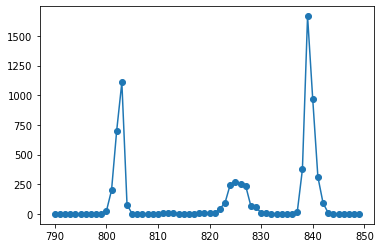

In [ ]:
pd.Series(IRENE8_electron_run_dict_oneorbit).apply(get_photon_inducing_event_count_per_second).apply(lambda x:x.n).plot(marker="o")

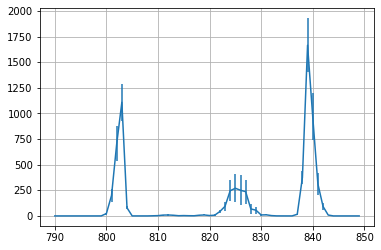

In [ ]:
plt.errorbar(x=pd.Series(IRENE8_electron_run_dict_oneorbit).apply(get_photon_inducing_event_count_per_second).index,
             y=pd.Series(IRENE8_electron_run_dict_oneorbit).apply(get_photon_inducing_event_count_per_second).apply(lambda x:x.n),
             yerr=pd.Series(IRENE8_electron_run_dict_oneorbit).apply(get_photon_inducing_event_count_per_second).apply(lambda x:x.std_dev))
plt.grid(True)

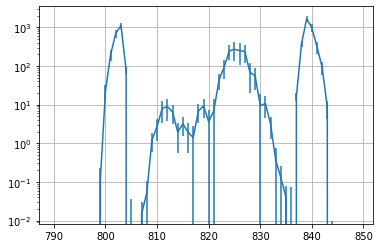

In [ ]:
plt.errorbar(x=pd.Series(IRENE8_electron_run_dict_oneorbit).apply(get_photon_inducing_event_count_per_second).index,
             y=pd.Series(IRENE8_electron_run_dict_oneorbit).apply(get_photon_inducing_event_count_per_second).apply(lambda x:x.n),
             yerr=pd.Series(IRENE8_electron_run_dict_oneorbit).apply(get_photon_inducing_event_count_per_second).apply(lambda x:x.std_dev))
plt.yscale("log")
plt.grid(True)